# Naming colors

If you are shown random colors evenly spaced across the color spectrum, what percentage of those colors would the average person name red? What about green? 

English speakers in the United States were shown 80 color chips in random order in controlled lighting condtions. These 80 colors are evenly spaced across the standard Munsell array of colors. The participants were told: "There are 11 choices: black, white, red, green, blue, purple, brown, yellow, orange, pink, gray. Choose the closest color word".

This study was then repeated with Bolivian-Spanish speakers in Bolivia and Tsimane' speakers from the Amazon.

The dataset `munsell-array-fixed-choice.csv` shows the most common name in each language for each color chip.

In [ ]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'munsell-array-fixed-choice.csv'.

# from google.colab import files
# uploaded = files.upload()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("munsell-array-fixed-choice.csv")
df.head()

,grid,x,y,munsell_code,tile_hex,english_color,spanish_color,tsimane_color,spanish,tsimane
0,B1,1,7,5R8/6,#fbb6b0,pink,pink,yellow,rosada (pink),chamus (yellow)
1,D1,1,5,5R6/12,#eb6a68,pink,pink,red,rosada (pink),jainas (red)
2,F1,1,3,5R4/14,#bb1933,red,red,red,rojo (red),jainas (red)
3,H1,1,1,5R2/8,#610d25,red,red,brown,rojo (red),cafedyeisi (brown)
4,A2,2,8,10R9/2,#f2ded8,pink,white,white,blanco (white),jaibas (white)


The function below plots the 80 evenly spaced colors that each study participant was shown in random order.

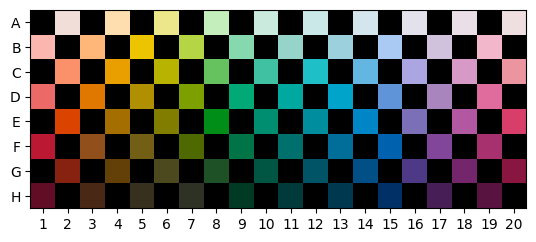

In [8]:
def plot_colors(color_column):
    fig, ax = plt.subplots()
    for idx, row in df.iterrows():
        ax.add_patch(plt.Rectangle((row['x'] - 0.5, row['y'] - 0.5), 1, 1, color=row[color_column], linewidth=0))

    ax.set_xlim(0.5, 20.5)
    ax.set_ylim(0.5, 8.5)
    ax.set_aspect('equal')
    ax.set_facecolor('black')
    ax.set_xticks(range(1, 21))
    ax.set_yticks(range(1, 9), ['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'])

plot_colors('tile_hex')

We can also use this function to plot the most common name in each language for each color chip.

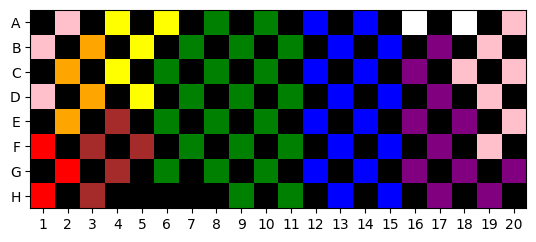

In [9]:
# Also try 'spanish_color' and 'tsimane_color'
plot_colors('english_color')

### Project Ideas:

- For each language, calculate what percentage of chips are named each color. Return dataframes for each language.

- Create a horizontal bar plot for each language. Each bar represents a color name and the length encodes the percentage of chips that are named that color.

- Is there a correlation between languages? Create scatter plots. 
	- Hint: the x-axis could be the percentage of chips for English speakers and the y-axis could be the percentage of chips for Tsimane speakers and each data point represents a color name.
	
	- You might need to `merge` dataframes.


In [12]:
# YOUR CODE HERE (add more cells as needed)
# For each language, calculate what percentage of chips are named each color. Return dataframes for each language.

df_long = df.melt(
    id_vars=['munsell_code'], 
    value_vars=['english_color', 'spanish_color', 'tsimane_color'],
    var_name='language', 
    value_name='color'
)

df_long['language'] = df_long['language'].str.replace('_color', '', regex=False)

print(df_long['language'].unique())

['english' 'spanish' 'tsimane']


In [14]:
color_counts = df_long.groupby(['language', 'color']).size().reset_index(name='count')
color_counts['percentage'] = color_counts.groupby('language')['count'].transform(lambda x: x / x.sum() * 100)

# Separate into individual DataFrames per language
dfs_by_language = {
    lang: color_counts[color_counts['language'] == lang].reset_index(drop=True)
    for lang in color_counts['language'].unique()
}

for lang, df_lang in dfs_by_language.items():
    print(f"\nTop colors in {lang.title()}:")
    print(df_lang.sort_values('percentage', ascending=False).head())


Top colors in English:
  language   color  count  percentage
3  english   green     22       27.50
1  english    blue     16       20.00
6  english  purple     11       13.75
5  english    pink     10       12.50
9  english  yellow      5        6.25

Top colors in Spanish:
  language      color  count  percentage
3  spanish      green     22       27.50
4  spanish  lightblue     11       13.75
7  spanish     purple     11       13.75
6  spanish       pink      8       10.00
9  spanish      white      6        7.50

Top colors in Tsimane:
  language   color  count  percentage
3  tsimane   green     20       25.00
1  tsimane    blue     12       15.00
7  tsimane  yellow     11       13.75
4  tsimane  purple     10       12.50
6  tsimane   white      9       11.25


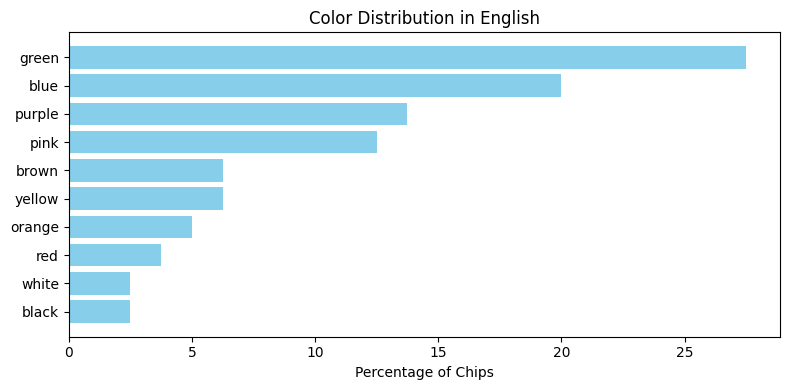

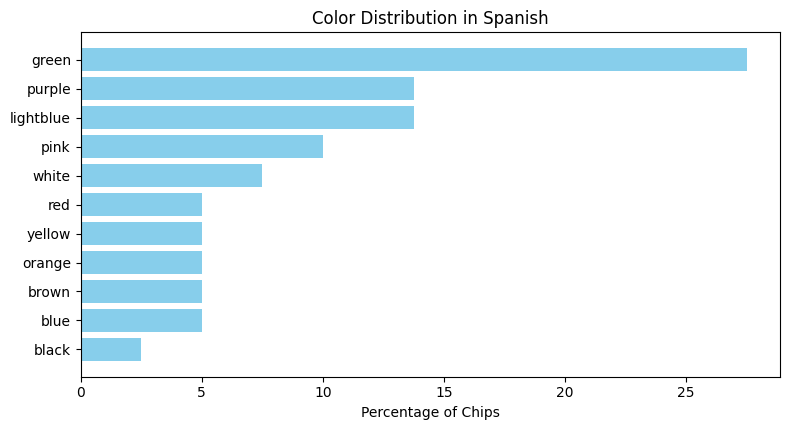

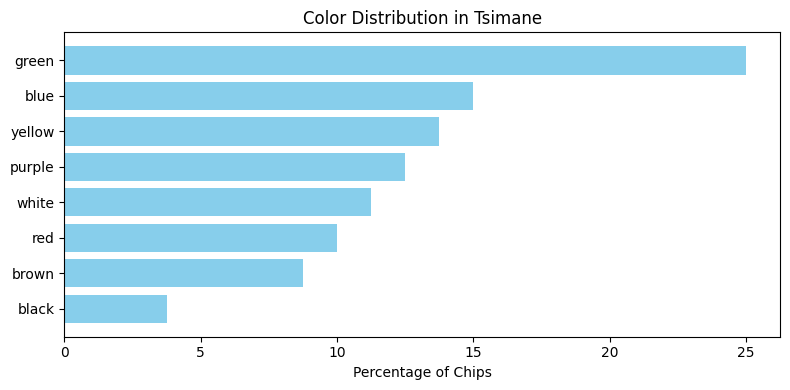

In [ ]:
# Create a horizontal bar plot for each language. Each bar represents a color name and the length encodes the percentage of chips that are named that color.
# # Loop through each language-specific DataFrame
for lang, df_lang in dfs_by_language.items():
    # Sort colors by percentage descending
    df_plot = df_lang.sort_values('percentage', ascending=True)

    # Create horizontal bar plot
    plt.figure(figsize=(8, max(4, len(df_plot) * 0.4)))
    plt.barh(df_plot['color'], df_plot['percentage'], color='skyblue')
    plt.xlabel('Percentage of Chips')
    plt.title(f'Color Distribution in {lang.title()}')
    plt.tight_layout()
    plt.show()

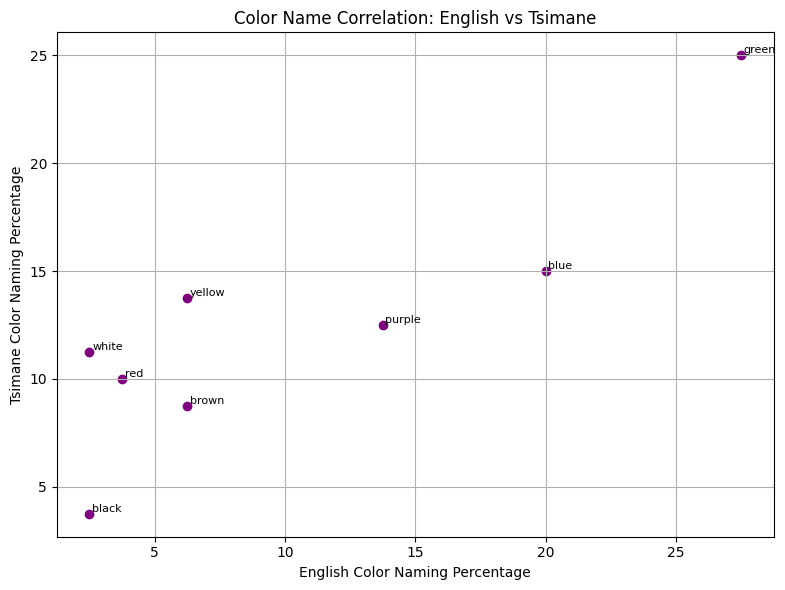

In [ ]:
# Is there a correlation between languages? Create scatter plots. 
# Hint: the x-axis could be the percentage of chips for English speakers and the y-axis could be the percentage of chips for Tsimane speakers and each data point represents a color name.
# - You might need to `merge` dataframes.

# Rename percentage columns for clarity before merging
df_en = dfs_by_language['english'].rename(columns={'percentage': 'english_pct'})
df_ts = dfs_by_language['tsimane'].rename(columns={'percentage': 'tsimane_pct'})

# Merge on the color name
merged_df = pd.merge(df_en, df_ts, on='color')

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['english_pct'], merged_df['tsimane_pct'], color='purple')

# Add labels
for i, row in merged_df.iterrows():
    plt.text(row['english_pct'] + 0.1, row['tsimane_pct'] + 0.1, row['color'], fontsize=8)

plt.xlabel('English Color Naming Percentage')
plt.ylabel('Tsimane Color Naming Percentage')
plt.title('Color Name Correlation: English vs Tsimane')
plt.grid(True)
plt.tight_layout()
plt.show()



In [18]:
correlation = merged_df['english_pct'].corr(merged_df['tsimane_pct'])
print(f"Correlation between English and Tsimane: {correlation:.2f}")


Correlation between English and Tsimane: 0.87


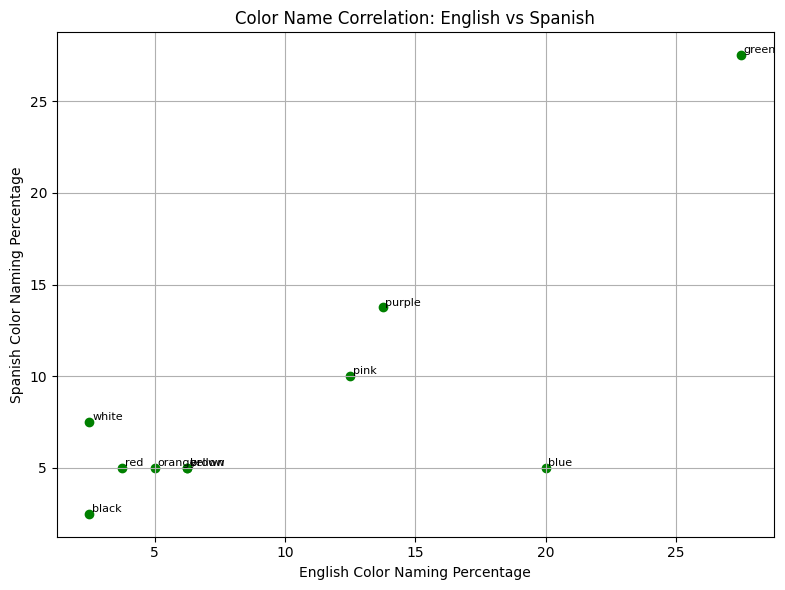

Correlation (English vs Spanish): 0.79


In [19]:
# Rename columns
df_en = dfs_by_language['english'].rename(columns={'percentage': 'english_pct'})
df_sp = dfs_by_language['spanish'].rename(columns={'percentage': 'spanish_pct'})

# Merge
merged_en_sp = pd.merge(df_en, df_sp, on='color')

# Plot
plt.figure(figsize=(8,6))
plt.scatter(merged_en_sp['english_pct'], merged_en_sp['spanish_pct'], color='green')

# Add labels
for _, row in merged_en_sp.iterrows():
    plt.text(row['english_pct'] + 0.1, row['spanish_pct'] + 0.1, row['color'], fontsize=8)

plt.xlabel('English Color Naming Percentage')
plt.ylabel('Spanish Color Naming Percentage')
plt.title('Color Name Correlation: English vs Spanish')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
corr_en_sp = merged_en_sp['english_pct'].corr(merged_en_sp['spanish_pct'])
print(f"Correlation (English vs Spanish): {corr_en_sp:.2f}")


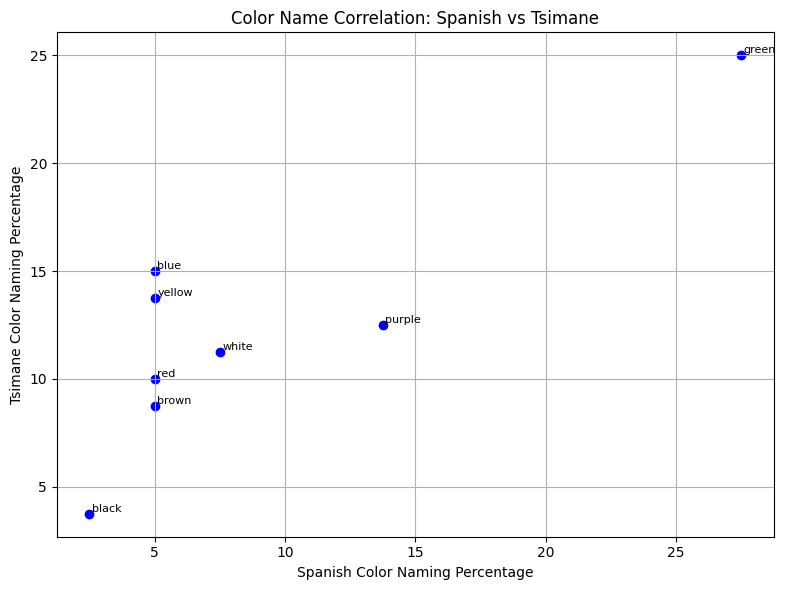

Correlation (Spanish vs Tsimane): 0.85


In [20]:
# Rename
df_ts = dfs_by_language['tsimane'].rename(columns={'percentage': 'tsimane_pct'})
df_sp = dfs_by_language['spanish'].rename(columns={'percentage': 'spanish_pct'})

# Merge
merged_sp_ts = pd.merge(df_sp, df_ts, on='color')

# Plot
plt.figure(figsize=(8,6))
plt.scatter(merged_sp_ts['spanish_pct'], merged_sp_ts['tsimane_pct'], color='blue')

# Add labels
for _, row in merged_sp_ts.iterrows():
    plt.text(row['spanish_pct'] + 0.1, row['tsimane_pct'] + 0.1, row['color'], fontsize=8)

plt.xlabel('Spanish Color Naming Percentage')
plt.ylabel('Tsimane Color Naming Percentage')
plt.title('Color Name Correlation: Spanish vs Tsimane')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
corr_sp_ts = merged_sp_ts['spanish_pct'].corr(merged_sp_ts['tsimane_pct'])
print(f"Correlation (Spanish vs Tsimane): {corr_sp_ts:.2f}")
